In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#loading the csv file
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
#getting info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:

#positive correlation
#negative correlation
correlation = gold_data.corr()

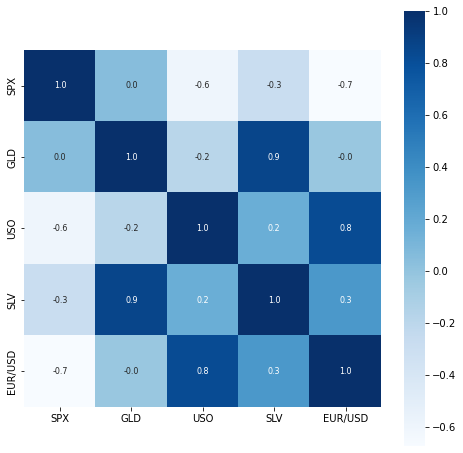

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
#correlation values of gld
print (correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


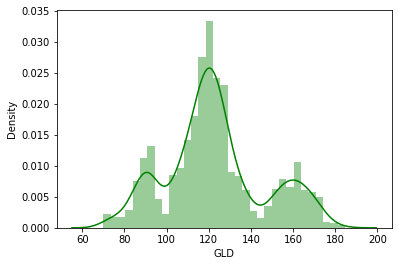

In [13]:
#checking the distribution of gld price
sns.distplot(gold_data['GLD'],color='green')

In [14]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [15]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
#splitting into test data and training data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
#model training
regressor =RandomForestRegressor(n_estimators=100)


RandomForestRegressor()

In [19]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
#prediction of test data
test_data_prediction=regressor.predict(x_test)
print(test_data_prediction)

[168.50199925  81.95629962 115.84469993 127.66290049 120.64530109
 154.85759762 150.26169783 126.17170043 117.38229877 125.93450102
 116.9922005  171.66740053 141.47889823 167.65519863 115.30350002
 117.61360039 139.85590333 170.24440082 160.13630334 158.7257996
 155.0068003  125.26160002 175.26599909 157.24120396 125.21160034
  93.77929979  77.17130021 120.60319974 119.07919908 167.38429989
  88.14730057 125.37700032  91.04070069 117.74189997 121.12579944
 136.54290136 115.46510126 115.40400069 147.57509903 107.303101
 104.07400223  87.22309795 126.3997009  117.86290023 152.85649905
 119.66110003 108.56749991 108.19239861  93.24220047 127.13309798
  74.82980056 113.50469884 121.46480008 111.33259895 119.00159921
 120.28949962 159.78330116 168.34800051 146.95449646  85.8742985
  94.26070043  86.94539901  90.55520001 118.89110076 126.4107007
 127.46370002 169.99789927 122.28739961 117.25319906  98.42140042
 168.84660127 142.97589804 132.73530269 121.20350234 120.74259908
 120.0072003  1

In [21]:
#r squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("r squared error: ",error_score)

r squared error:  0.9888012917924355


In [22]:
#comparing actual and predicted values
y_test=list(y_test)

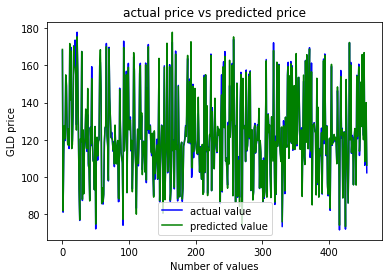

In [23]:
plt.plot(y_test,color='blue',label='actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title('actual price vs predicted price')
plt.ylabel('GLD price')
plt.xlabel('Number of values')
plt.legend()
plt.show()